In [44]:
# Example of an scikit-learn pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
)

In [2]:
# Load data

# iris dataset: sepal length, sepal width, petal length, petal width --> type of iris (setosa, versicolor, virginica)
data = load_iris()
X, y = data.data, data.target

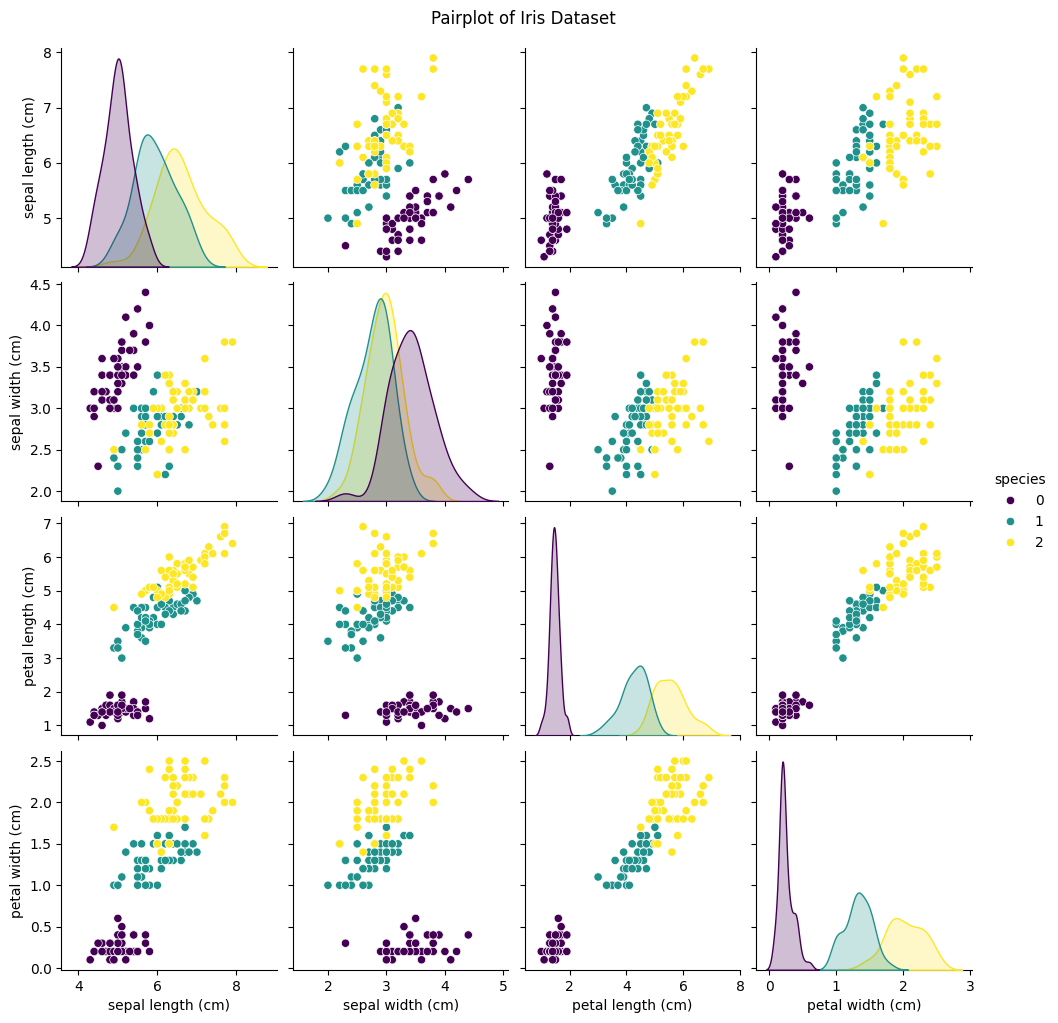

In [45]:
# sns pairplot

# Convert X (numpy array) to a DataFrame
df = pd.DataFrame(X, columns=data.feature_names)
df["species"] = y  # Add 'species' column

sns.pairplot(df, hue="species", palette="viridis")
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

In [36]:
X.shape  # 150 samples, 4 features

(150, 4)

In [33]:
# quick look at sample data
print(data.data[:5])
print(data.target[:5])
print(data.feature_names)
print(data.target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


/var/folders/hq/4zf8zzj14kx2rpg0wjq7rdh80000gn/T/ipykernel_91048/56188116.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data.target_names[y], palette='viridis')


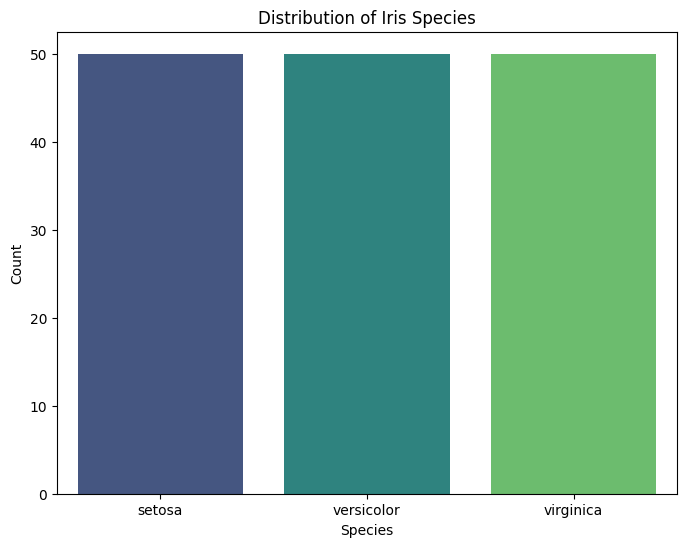

In [30]:
# distribution of target classes
plt.figure(figsize=(8, 6))
sns.countplot(x=data.target_names[y], palette="viridis")
plt.title("Distribution of Iris Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

In [3]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,  # (120 traing and 30 testing samples)
    random_state=42,
)

In [34]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

/var/folders/hq/4zf8zzj14kx2rpg0wjq7rdh80000gn/T/ipykernel_91048/1755479266.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data.target_names[y_train], palette="viridis")


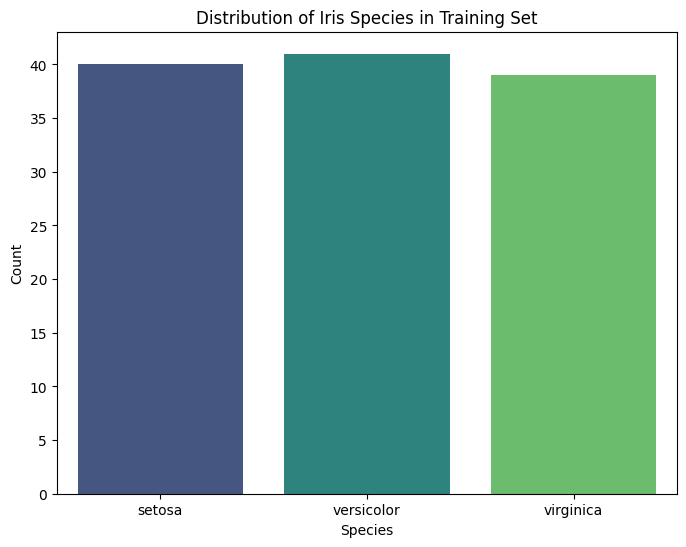

In [37]:
# training target dists still balanced?
plt.figure(figsize=(8, 6))
sns.countplot(x=data.target_names[y_train], palette="viridis")
plt.title("Distribution of Iris Species in Training Set")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

In [38]:
# Define the steps in the pipeline
steps = [
    ("scaler", StandardScaler()),  # Preprocessing step
    ("rf", RandomForestClassifier()),  # Estimator step
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define the parameter grid
param_grid = {"rf__n_estimators": [50, 100, 200], "rf__max_depth": [None, 5, 10, 15]}
# tries 50, 100 and 200 trees
# tries max depth of 5, 10, 15

In [39]:
# Set up the GridSearchCV
cv = GridSearchCV(pipeline, param_grid, cv=5)  # 5-fold cross-validation

# Fit the model with GridSearchCV to find the best parameters
cv.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", cv.best_params_)

Best parameters found:  {'rf__max_depth': None, 'rf__n_estimators': 100}


In [47]:
# Check results with non-optimal parameters
pipeline.fit(X_train, y_train)
default_preds = pipeline.predict(X_test)

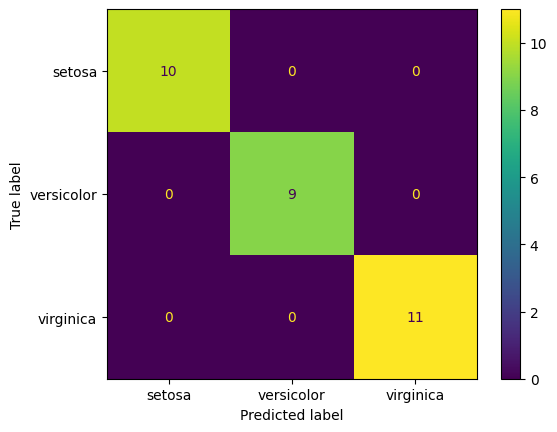

In [50]:
ConfusionMatrixDisplay.from_predictions(
    y_test, default_preds, display_labels=data.target_names
)

In [40]:
# Train the model with the best parameters on the full training data
best_pipeline = cv.best_estimator_
best_pipeline.fit(X_train, y_train)

# Predictions
predictions = best_pipeline.predict(X_test)

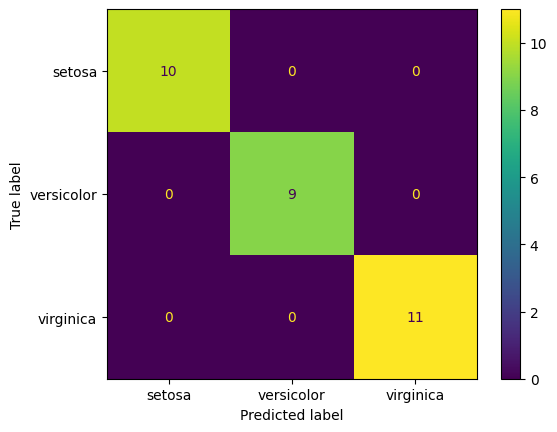

In [28]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, predictions, display_labels=data.target_names
)

In [14]:
# from the confusion matrix, we can conpute accuracy, precision, recall, f1-score...or use classification_report
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=data.target_names))
# precision: positive results are actually positive (useful in scenarios where minimizing false positives is crucial, such as spam email detection)
# recall: gets all positive results (useful in scenarios where minimizing false negatives is crucial, such as fault detection in critical systems)
# f1-score:harmonic mean of precision and recall (balance between precision and recall since they have an inverse relationship)
# support: number of occurences of each class in y_test


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

